# Run to start

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df_title_ratings = pd.read_csv("/content/drive/MyDrive/Wild Code School/title_ratings.zip", sep = ",")


df_not_in_seriers = pd.read_csv("/content/drive/MyDrive/Wild Code School/not_in_series_films.zip", sep = ",")

df_episodis = pd.read_csv("/content/drive/MyDrive/Wild Code School/Copy of episodes_cleaned.csv", sep = ",")


In [4]:
df_merged_table = df_title_ratings.merge(df_not_in_seriers, left_on='title_id', right_on='title_id') 
df_merged_table = df_merged_table.drop(columns=['title_id', 'isAdult','startYear','endYear','runtime','genres'])


In [5]:
df_merged_table1 = df_title_ratings.merge(df_episodis, left_on='title_id', right_on='title_id') 
df_merged_table1 = df_merged_table1.drop(columns=['primaryTitle', 'seasonNumber','episodeNumber' ])
df_merged_table2 = df_title_ratings.merge(df_episodis, left_on='title_id', right_on='title_id') 

df_showsum = df_merged_table2
df_showsum = df_merged_table2.groupby(['series_id']).sum()
df_showsum = df_showsum.drop(columns=['averageRating'])
df_showavg = df_merged_table1.groupby(['series_id']).mean()
df_showavg = df_showavg.rename(columns={"averageRating":"averageRatingshow"})
df_showavg = df_showavg.drop(columns=['numVotes'])
df_showsum = df_showsum.drop(columns=['seasonNumber', 'episodeNumber'])

In [6]:
df_showavg = df_episodis.merge(df_showavg, left_on='series_id', right_on='series_id') 
df_showsum.reset_index()

df_showavg = df_showavg.drop_duplicates(subset=['series_id'])

df_showavg = df_showavg.round(1)
df_showavg = df_showsum.merge(df_showavg, left_on="series_id" , right_on = "series_id")
df_showavg = df_showavg.drop(columns=['title_id','primaryTitle','seasonNumber','episodeNumber','primaryTitle'])

df_showavg = df_showavg.set_index('series_id')


In [7]:
#df_showavg.info()
df_showavg = df_showavg.sort_values(["numVotes"], ascending = ( False)) 
df_showavg.head(1)
#df_showsum = df_showsum.sort_values(["numVotes"], ascending = ( False)) 


,numVotes,seriesTitle,averageRatingshow
series_id,,,
tt0944947,3838449,Game of Thrones,8.8


# **Top Ten Movies based on perfect rating**

In [8]:
df_top_ten_movies =  df_merged_table.sort_values(["averageRating", "numVotes"], ascending = (False, False)) 
df_top_ten = df_top_ten_movies.head(5) # to find the to top 10 movies based on rating and numvotes 
df_top_ten = df_top_ten[["primaryTitle", "averageRating", "numVotes"]]
df_top_ten = df_top_ten.rename(columns={"averageRating":"Rating", "numVotes":"Number of Votes","primaryTitle":"Title"})
df_top_ten

,Title,Rating,Number of Votes
321104,Cabin,10.0,561
303988,Tari Sathe,10.0,432
261044,Mr. Swag Boss and the Inglorious Pacifist,10.0,402
326949,The Great Escape of Mr. Swag Boss,10.0,264
314857,Queer Icon: The Cult of Bette Davis,10.0,220


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


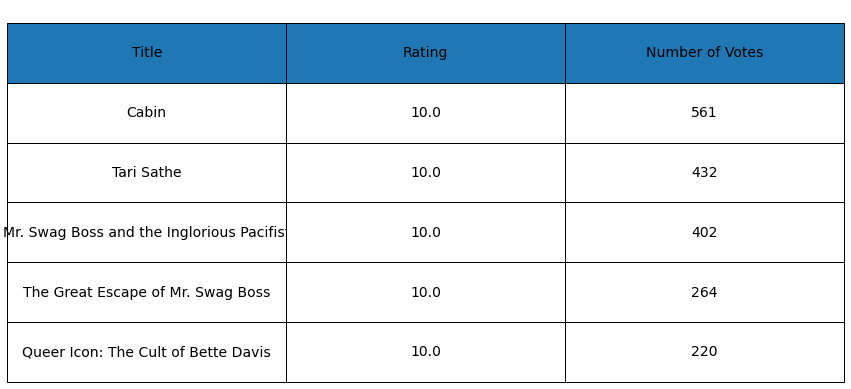

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 3))


fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


#ax.set_title('Top Ten Movies based on perfect rating', 
            #fontweight ="bold") 
table_top_ten = ax.table(cellText=df_top_ten.values, colLabels=df_top_ten.columns, loc='center', colColours =["tab:blue"] * 100, colLoc = 'center' , cellLoc='center', colWidths=[0.5 for x in df_top_ten.columns],
          bbox=[0.0, -1.3, 1, 2.2],  )
table_top_ten.auto_set_font_size(False)
table_top_ten.set_fontsize(14)

fig.tight_layout()

plt.show()

# **Top Ten Movies based on real number of votes**

In [10]:
df_above_200k_higest_votes = df_merged_table[df_merged_table.numVotes > 200000]
df_top10_realmovies = df_above_200k_higest_votes.sort_values(["averageRating", "numVotes"], ascending = (False, False)) 
df_top10_realmovies = df_top10_realmovies.head(5) # to find the to top 10 movies
df_top10_realmovies = df_top10_realmovies.rename(columns={"averageRating":"Rating", "numVotes":"Number of Votes","primaryTitle":"Title"})
df_top10_realmovies = df_top10_realmovies[["Title", "Rating", "Number of Votes"]]
df_top10_realmovies

,Title,Rating,Number of Votes
75496,The Shawshank Redemption,9.3,2486414
43985,The Godfather,9.2,1716433
219558,The Dark Knight,9.0,2440141
46216,The Godfather: Part II,9.0,1192128
29243,12 Angry Men,9.0,735574


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


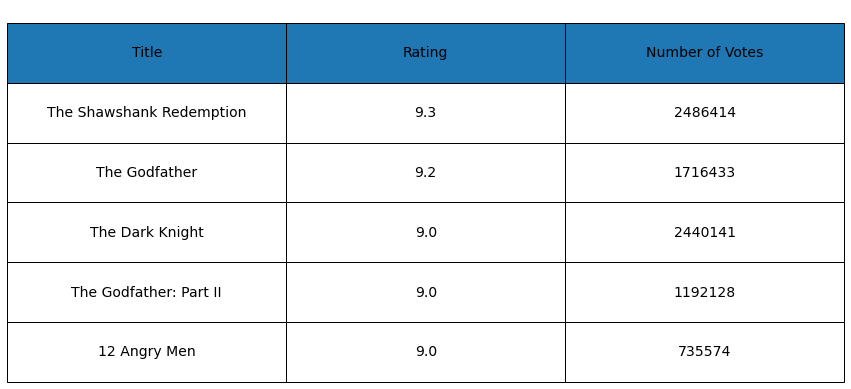

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 3))


fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


#ax.set_title('Top Ten Movies based on real number of votes', 
             #fontweight ="bold") 
table_top10_realmovies = ax.table(cellText=df_top10_realmovies.values, colLabels=df_top10_realmovies.columns, loc='center', colColours =["tab:blue"] * 100, colLoc = 'center' , cellLoc='center', colWidths=[0.5 for x in df_top10_realmovies.columns],
          bbox=[0.0, -1.3, 1, 2.2],  )
table_top10_realmovies.auto_set_font_size(False)
table_top10_realmovies.set_fontsize(14)

fig.tight_layout()

plt.show()

# **Top Ten Shows based on perfect rating**

In [12]:
df_top_ten_shows =  df_showavg.sort_values(["averageRatingshow", "numVotes"], ascending = (False, False)) 
df_top_ten_shows = df_top_ten_shows.head(5)
df_top_ten_shows = df_top_ten_shows.rename(columns={"averageRatingshow":"Rating", "numVotes":"Number of Votes","seriesTitle":"Title"})
df_top_ten_shows = df_top_ten_shows[["Title", "Rating", "Number of Votes"]]


df_top_ten_shows.head()

,Title,Rating,Number of Votes
series_id,,,
tt0401937,Generations,10.0,5248
tt0870039,Growing Up Creepie,10.0,4690
tt15206580,Little Mom,10.0,3448
tt12661310,The George Lucas Talk Show,10.0,1373
tt13950332,While the Rest of Us Die: Secrets of America's...,10.0,1034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


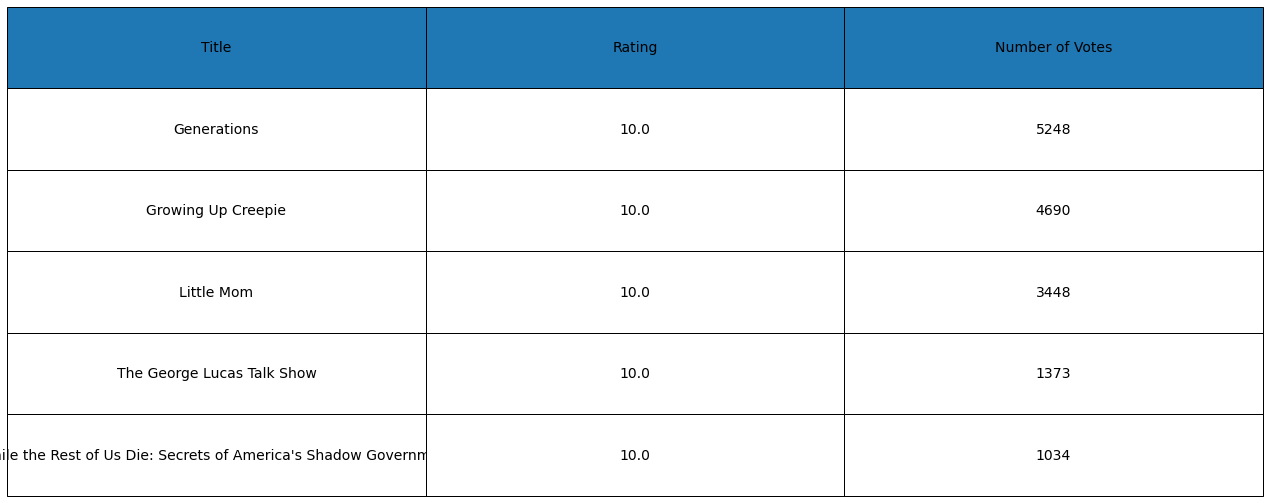

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 3))


fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#ax.set_title('Top Ten Shows based on real number of votes', 
            # fontweight ="bold", loc = 'right') 
table_top_ten_shows= ax.table(cellText=df_top_ten_shows.values, colLabels=df_top_ten_shows.columns, loc='center', colColours =["tab:blue"] * 100, colLoc = 'center' , cellLoc='center', colWidths=[0.5 for x in df_top_ten_shows.columns],
          bbox=[0., -2, 1.5, 3],  )
table_top_ten_shows.auto_set_font_size(False)
table_top_ten_shows.set_fontsize(14)

fig.tight_layout()

plt.show()

# **Top Ten Shows based on real number of votes**


In [14]:
df_shows_above_5k = df_showavg[df_showavg.numVotes > 300000]
df_shows_above_5k = df_shows_above_5k.sort_values(["averageRatingshow", "numVotes"], ascending = (False, False)) 
df_shows_above_5k = df_shows_above_5k.head(5)
df_shows_above_5k = df_shows_above_5k.rename(columns={"averageRatingshow":"Rating", "numVotes":"Number of Votes","seriesTitle":"Title"})
df_shows_above_5k = df_shows_above_5k[["Title", "Rating", "Number of Votes"]]


df_shows_above_5k.head()

,Title,Rating,Number of Votes
series_id,,,
tt2560140,Attack on Titan,9.3,1115515
tt5753856,Dark,9.1,310596
tt0903747,Breaking Bad,9.0,1545001
tt4158110,Mr. Robot,9.0,363999
tt1839578,Person of Interest,9.0,336063


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


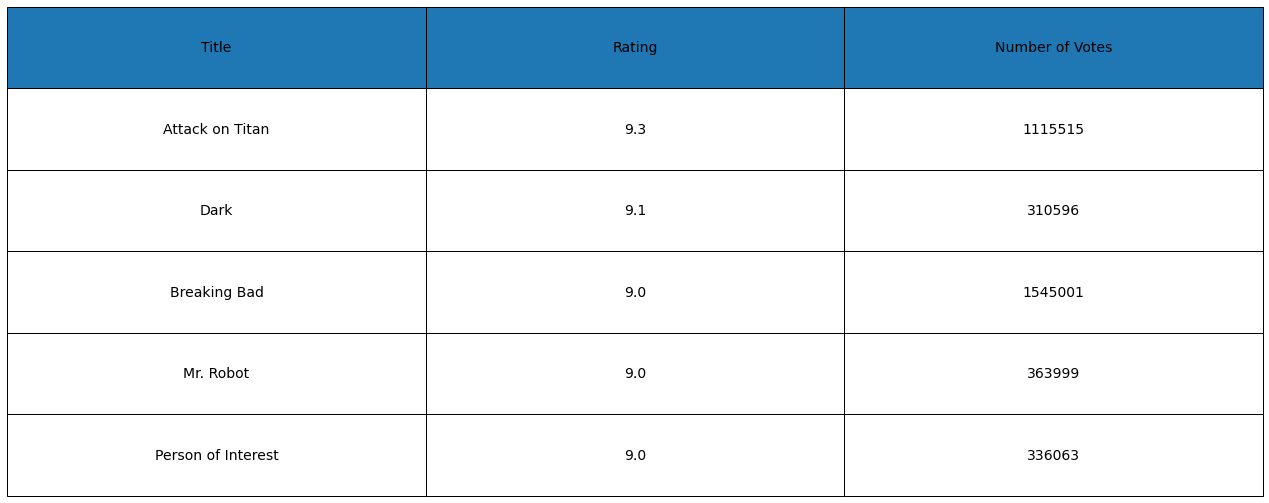

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 3))


fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#ax.set_title('Top Ten Shows based on real number of votes', 
#             fontweight ="bold", loc = 'right') 
table_top_ten_shows= ax.table(cellText=df_shows_above_5k.values, colLabels=df_shows_above_5k.columns, loc='center', colColours =["tab:blue"] * 100, colLoc = 'center' , cellLoc='center', colWidths=[0.5 for x in df_shows_above_5k.columns],
          bbox=[0., -2, 1.5, 3],  )
table_top_ten_shows.auto_set_font_size(False)
table_top_ten_shows.set_fontsize(14)

fig.tight_layout()

plt.show()